In [1]:
%reset -f

import pandas as pd

# First for DK1
area = "DK2"  #DK1 is Vestdanmark and DK2 is Østdanmark

# Load the provided CSV file
file_path = f'Data/{area}spot.csv'

# Load the CSV into a DataFrame
spot_price = pd.read_csv(file_path, delimiter=';')

DK1_spot = spot_price[['HourUTC', 'SpotPriceDKK']].rename(columns={'SpotPriceDKK': 'DK1_spot'})

# Then for DK2
area = "DK2"  #DK1 is Vestdanmark and DK2 is Østdanmark

# Load the provided CSV file
file_path = f'Data/{area}spot.csv'

# Load the CSV into a DataFrame
spot_price = pd.read_csv(file_path, delimiter=';')

DK2_spot = spot_price[['HourUTC', 'SpotPriceDKK']].rename(columns={'SpotPriceDKK': 'DK2_spot'})

# Merge DK1 and DK2 spot prices
spot_prices = pd.merge(DK1_spot, DK2_spot, on='HourUTC')
spot_prices['HourUTC'] = pd.to_datetime(spot_prices['HourUTC']).dt.strftime('%Y-%m-%d %H:%M:%S')
spot_prices = spot_prices.rename(columns={'HourUTC': 'DATE'})

spot_prices['DK1_spot'] = spot_prices['DK1_spot'].str.replace(',', '.').astype(float)
spot_prices['DK2_spot'] = spot_prices['DK2_spot'].str.replace(',', '.').astype(float)

# Load weather data
years = list(range(2014, 2024 + 1))

# Load and append all the CSVs into one dataframe using forward slashes
weather_df = pd.concat([pd.read_csv(f'Data/{year}.csv') for year in years])

weather_df['observed'] = pd.to_datetime(weather_df['observed']).dt.strftime('%Y-%m-%d %H:%M:%S')
weather_df = weather_df.rename(columns={'observed': 'DATE'})

# Merge again
merged_df = pd.merge(spot_prices, weather_df, left_on='DATE', right_on='DATE')

# Order columns alphabetically, then sort by DATE
merged_df = merged_df.reindex(sorted(merged_df.columns), axis=1)
merged_df = merged_df.sort_values(by='DATE')

# Set the DATE column as the index
merged_df = merged_df.set_index('DATE')

merged_df

# Save the merged DataFrame to a CSV file
merged_df.to_csv('Data/merged_data.csv')

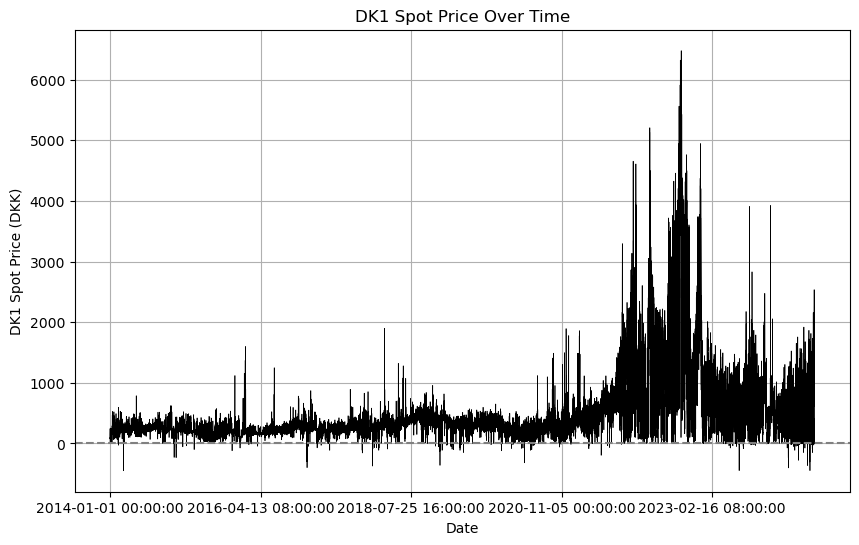

In [2]:
import matplotlib.pyplot as plt

filtered_df = merged_df[merged_df.index >= '2014-01-01']

# Plot DK1_spot with black color, smaller line thickness, and x-line at y=0
plt.figure(figsize=(10,6))
filtered_df['DK1_spot'].plot(color='black', linewidth=0.5)  # Black line with smaller thickness

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0

plt.title('DK1 Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('DK1 Spot Price (DKK)')
plt.grid(True)
plt.show()


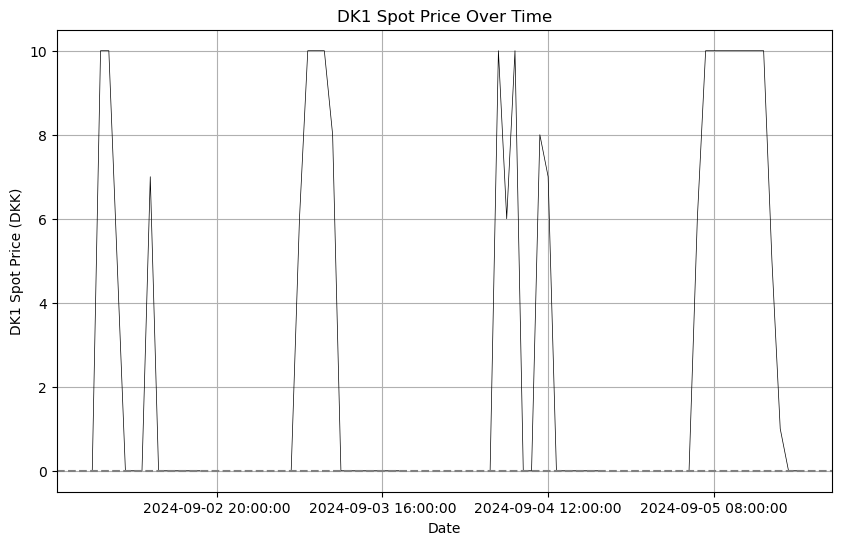

In [3]:
import matplotlib.pyplot as plt

filtered_df = merged_df[merged_df.index >= '2024-09-02']

# Plot DK1_spot with black color, smaller line thickness, and x-line at y=0
plt.figure(figsize=(10,6))
filtered_df['sun_06031'].plot(color='black', linewidth=0.5)  # Black line with smaller thickness

plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at y=0

plt.title('DK1 Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('DK1 Spot Price (DKK)')
plt.grid(True)
plt.show()
